In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.figsize"]=8,4
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
movies = pd.read_csv("C:\\Users\\Bibhu\\Desktop\\Oracle_ML\\Assignment\\Movie-Ratings.csv")

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
len(movies)

559

In [8]:
movies.shape

(559, 6)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns = ["Film","Genre","CriticsRatings","AudienceRatings","BudgetMillions","Year"]

In [12]:
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.columns

Index(['Film', 'Genre', 'CriticsRatings', 'AudienceRatings', 'BudgetMillions',
       'Year'],
      dtype='object')

In [14]:
# CriticsRating , AudienceRatings,BudgetMillions are integer and thats ok
# Year too is integer , where we really dont want it to be a integer, they are more of a category for us than just numbers/integers

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
# lets turn variables into category datatype for better analysis
# nothing changes in data but movies.info() will show a changed type
movies.Film = movies.Film.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [17]:
# lets change Genre and year as well into category
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [19]:
# data displayed in same fashion even after datatype is changed to category
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [20]:
len(movies.Genre)

559

In [21]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [22]:
# Different categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [23]:
# if you now see Year column has been ignored as it is now category datatype
movies.describe()

,CriticsRatings,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [24]:
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


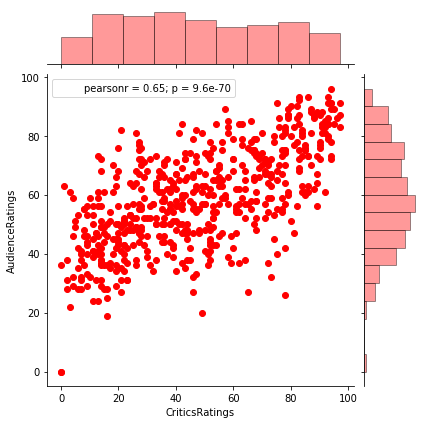

In [25]:
# joint plot for CriticsRatings Vs AudienceRatings
j = sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',color='Red')

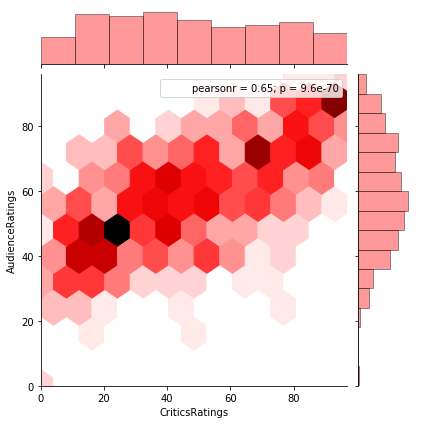

In [32]:
# joint plot for CriticsRatings Vs AudienceRatings
j = sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',color='Red',kind="hex")


In [27]:
fildata = movies[movies.CriticsRatings == movies.AudienceRatings]


In [28]:
fildata.sort_values("CriticsRatings")

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
293,Paranormal Activity 2,Horror,0,0,3,2010
354,Something Borrowed,Romance,0,0,35,2011
447,The Longshots,Comedy,39,39,30,2008
382,Taking Woodstock,Comedy,48,48,29,2009
251,Morning Glory,Comedy,54,54,40,2010
330,Salt,Action,62,62,110,2010
179,I Am Legend,Thriller,69,69,150,2007
265,Never Let Me Go,Drama,70,70,15,2010
131,Footloose,Drama,71,71,24,2011
342,Shame,Drama,80,80,7,2011


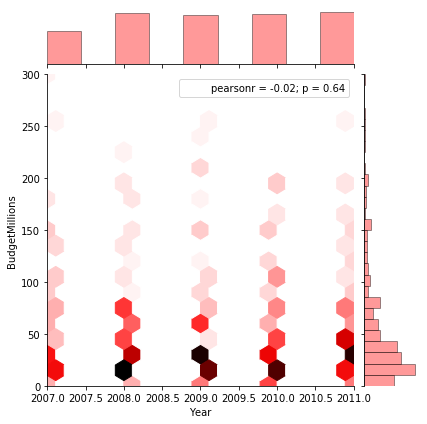

In [31]:
#The Pearson correlation coefficient measures the linear relationship between two datasets
#The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets
# try combination (CriticsRatings vs AudienceRatings, Year Vs Budget, Year Vs CriticsRatings, CriticsRatings vs Year)
#j = sns.jointplot(data=movies, x='CriticsRatings',y='Year',color='Red',kind="hex")
j = sns.jointplot(data=movies, x='Year',y='BudgetMillions',color='Red',kind="hex")


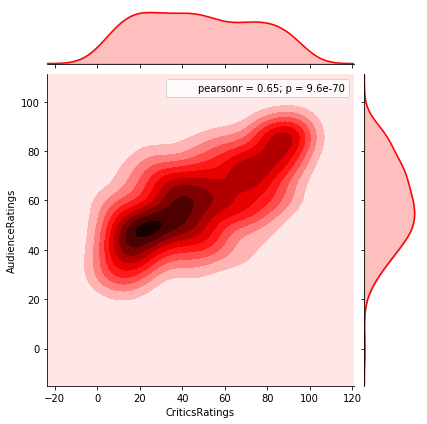

In [33]:
j = sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',color='Red',kind="kde")